In [41]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os




# Data Augmentation

In [42]:
Data_Directory = './Data/15_Nov_Readings'
# Data_Directory = './Data/23_Dec_Readings'
# file = './Data_1/ble_datalog_2024-09-12_16-05-30.csv'

In [43]:
import re

def convert_log_to_dict(log_string):
    # Regular expression to extract the necessary information
    pattern = r"\d+\. (ble_datalog__Rx_\d__\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}) \(grid (\d+),(\d+)\)"
    matches = re.findall(pattern, log_string)

    # Constructing the dictionary in the desired format
    result = {}
    for match in matches:
        filename = f"{match[0]}.csv"
        grid_coordinates = (int(match[1]), int(match[2]))
        result[filename] = grid_coordinates

    return result

# Input log string
log_string = """

1. ble_datalog__Rx_0__2024-11-15_14-31-48 (grid 0,0)
2. ble_datalog__Rx_0__2024-11-15_14-40-19 (grid 0,2)
3. ble_datalog__Rx_0__2024-11-15_14-49-52 (grid 0,4)
4. ble_datalog__Rx_0__2024-11-15_15-00-16 (grid 0,6)
5. ble_datalog__Rx_0__2024-11-15_15-15-55 (grid 1,6)
6. ble_datalog__Rx_0__2024-11-15_15-27-08 (grid 1,4)
7. ble_datalog__Rx_0__2024-11-15_15-49-58 (grid 1,2)
8. ble_datalog__Rx_0__2024-11-15_16-00-49 (grid 1,0)

9. ble_datalog__Rx_0__2024-11-15_16-12-06 (grid 2,0)
10. ble_datalog__Rx_0__2024-11-15_16-22-52 (grid 2,2)
11. ble_datalog__Rx_0__2024-11-15_16-30-11 (grid 2,4)
12. ble_datalog__Rx_0__2024-11-15_16-40-04 (grid 2,6)
13. ble_datalog__Rx_1__2024-11-15_14-31-48 (grid 0,1)
14. ble_datalog__Rx_1__2024-11-15_14-40-19 (grid 0,3)
15. ble_datalog__Rx_1__2024-11-15_14-49-52 (grid 0,5)
16. ble_datalog__Rx_1__2024-11-15_15-00-16 (grid 0,7)
17. ble_datalog__Rx_1__2024-11-15_15-15-55 (grid 1,7)
18. ble_datalog__Rx_1__2024-11-15_15-27-08 (grid 1,5)
19. ble_datalog__Rx_1__2024-11-15_15-49-58 (grid 1,3)
20. ble_datalog__Rx_1__2024-11-15_16-00-49 (grid 1,1)

21. ble_datalog__Rx_1__2024-11-15_16-12-06 (grid 2,1)
22. ble_datalog__Rx_1__2024-11-15_16-22-52 (grid 2,3)
23. ble_datalog__Rx_1__2024-11-15_16-30-11 (grid 2,5)
24. ble_datalog__Rx_1__2024-11-15_16-40-04 (grid 2,7)
25. ble_datalog__Rx_0__2024-12-20_11-44-25 (grid 7,7)
26. ble_datalog__Rx_0__2024-12-20_11-59-04 (grid 7,5)
27. ble_datalog__Rx_0__2024-12-20_12-07-23 (grid 7,3)
28. ble_datalog__Rx_0__2024-12-20_12-16-53 (grid 7,1)
29. ble_datalog__Rx_0__2024-12-20_12-29-19 (grid 6,1)
30. ble_datalog__Rx_0__2024-12-20_12-38-32 (grid 6,3)
31. ble_datalog__Rx_0__2024-12-20_12-50-19 (grid 6,5)
32. ble_datalog__Rx_0__2024-12-20_13-00-31 (grid 6,7)
33. ble_datalog__Rx_1__2024-12-20_11-44-25 (grid 7,6)
34. ble_datalog__Rx_1__2024-12-20_11-59-04 (grid 7,4)
35. ble_datalog__Rx_1__2024-12-20_12-07-23 (grid 7,2)
36. ble_datalog__Rx_1__2024-12-20_12-16-53 (grid 7,0)
37. ble_datalog__Rx_1__2024-12-20_12-29-19 (grid 6,0)
38. ble_datalog__Rx_1__2024-12-20_12-38-32 (grid 6,2)
39. ble_datalog__Rx_1__2024-12-20_12-50-19 (grid 6,4)
40. ble_datalog__Rx_1__2024-12-20_13-00-31 (grid 6,6)

41. ble_datalog__Rx_0__2024-12-20_12-58-34 (grid 4,0)
42. ble_datalog__Rx_0__2024-12-20_13-19-06 (grid 3,1)
43. ble_datalog__Rx_0__2024-12-20_13-31-34 (grid 3,3)
44. ble_datalog__Rx_0__2024-12-20_13-52-04 (grid 3,5)
45. ble_datalog__Rx_0__2024-12-20_14-06-34 (grid 3,7)
46. ble_datalog__Rx_0__2024-12-20_14-17-14 (grid 4,7)
47. ble_datalog__Rx_0__2024-12-20_14-29-28 (grid 5,4)
48. ble_datalog__Rx_0__2024-12-20_14-36-29 (grid 5,2)
49. ble_datalog__Rx_0__2024-12-20_14-43-52 (grid 5,0)

50. ble_datalog__Rx_1__2024-12-20_12-58-34 (grid 3,0)
51. ble_datalog__Rx_1__2024-12-20_13-19-06 (grid 3,2)
52. ble_datalog__Rx_1__2024-12-20_13-31-34 (grid 4,3)
53. ble_datalog__Rx_1__2024-12-20_13-52-04 (grid 3,4)
54. ble_datalog__Rx_1__2024-12-20_14-06-34 (grid 3,6)
55. ble_datalog__Rx_1__2024-12-20_14-17-14 (grid 5,7)
56. ble_datalog__Rx_1__2024-12-20_14-29-28 (grid 5,5)
57. ble_datalog__Rx_1__2024-12-20_14-36-29 (grid 5,3)
58. ble_datalog__Rx_1__2024-12-20_14-43-52 (grid 5,1)

59. ble_datalog__Rx_2__2024-12-20_12-58-34 (grid 4,1)
60. ble_datalog__Rx_2__2024-12-20_13-19-06 (grid 4,2)
61. ble_datalog__Rx_2__2024-12-20_13-31-34 (grid 4,4)
62. ble_datalog__Rx_2__2024-12-20_13-52-04 (grid 4,5)
63. ble_datalog__Rx_2__2024-12-20_14-06-34 (grid 4,6)
64. ble_datalog__Rx_2__2024-12-20_14-17-14 (grid 5,6)


"""

coord_mapping  = convert_log_to_dict(log_string)

print(f"{{\n    {coord_mapping}\n}}")



{
    {'ble_datalog__Rx_0__2024-11-15_14-31-48.csv': (0, 0), 'ble_datalog__Rx_0__2024-11-15_14-40-19.csv': (0, 2), 'ble_datalog__Rx_0__2024-11-15_14-49-52.csv': (0, 4), 'ble_datalog__Rx_0__2024-11-15_15-00-16.csv': (0, 6), 'ble_datalog__Rx_0__2024-11-15_15-15-55.csv': (1, 6), 'ble_datalog__Rx_0__2024-11-15_15-27-08.csv': (1, 4), 'ble_datalog__Rx_0__2024-11-15_15-49-58.csv': (1, 2), 'ble_datalog__Rx_0__2024-11-15_16-00-49.csv': (1, 0), 'ble_datalog__Rx_0__2024-11-15_16-12-06.csv': (2, 0), 'ble_datalog__Rx_0__2024-11-15_16-22-52.csv': (2, 2), 'ble_datalog__Rx_0__2024-11-15_16-30-11.csv': (2, 4), 'ble_datalog__Rx_0__2024-11-15_16-40-04.csv': (2, 6), 'ble_datalog__Rx_1__2024-11-15_14-31-48.csv': (0, 1), 'ble_datalog__Rx_1__2024-11-15_14-40-19.csv': (0, 3), 'ble_datalog__Rx_1__2024-11-15_14-49-52.csv': (0, 5), 'ble_datalog__Rx_1__2024-11-15_15-00-16.csv': (0, 7), 'ble_datalog__Rx_1__2024-11-15_15-15-55.csv': (1, 7), 'ble_datalog__Rx_1__2024-11-15_15-27-08.csv': (1, 5), 'ble_datalog__Rx_1__2

In [44]:
def normalize_time_columns(df, time_columns):
    for col in time_columns:
        df[col] = pd.to_datetime(df[col], format='%H-%M-%S')
        min_time = df[col].min()
        df[col] = (df[col] - min_time).dt.total_seconds()
    return df

# Function to process each CSV file
def process_csv(file_path, x_coord, y_coord):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Add X_Coord and Y_Coord from mapping
    data['X_Coord'] = x_coord
    data['Y_Coord'] = y_coord

    # Identify and normalize time columns
    time_columns = [col for col in data.columns if 'Time' in col]
    data = normalize_time_columns(data, time_columns)

    return data

# Main function to process all CSV files in a directory
def combine_all_csvs(directory, coord_mapping):
    combined_data = []  # List to store individual DataFrames
    
    for filename in coord_mapping.keys():
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)

            # Get X_Coord and Y_Coord from the mapping
            if filename in coord_mapping:
                x_coord, y_coord = coord_mapping[filename]
            else:
                # Default coordinates if not in the mapping
                x_coord, y_coord = (0, 0)

            # Process CSV and add to the list
            data = process_csv(file_path, x_coord, y_coord)
            combined_data.append(data)

    # Concatenate all DataFrames into one large DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)
    return combined_df



In [45]:
combined_df = combine_all_csvs(Data_Directory, coord_mapping)

# Now print the DataFrame
combined_df

,Tx_0 RSSI,Tx_0 Batt,Tx_0 Time,Tx_1 RSSI,Tx_1 Batt,Tx_1 Time,Tx_2 RSSI,Tx_2 Batt,Tx_2 Time,Tx_3 RSSI,Tx_3 Batt,Tx_3 Time,Tx_4 RSSI,Tx_4 Batt,Tx_4 Time,Tx_5 RSSI,Tx_5 Batt,Tx_5 Time,Tx_6 RSSI,Tx_6 Batt,Tx_6 Time,Tx_7 RSSI,Tx_7 Batt,Tx_7 Time,X_Coord,Y_Coord
0,-58,4.16,0.0,-65,4.13,0.0,-72,4.13,0.0,127,-99.00,0.0,-74,4.11,0.0,-75,4.09,0.0,-81,4.12,0.0,-73,4.10,0.0,0,0
1,-59,4.11,21.0,-67,4.15,21.0,-72,4.11,20.0,-77,4.12,17.0,-72,4.11,17.0,-76,4.07,17.0,-80,4.12,15.0,-75,-2.00,17.0,0,0
2,-59,4.14,38.0,-67,4.14,38.0,-73,-2.00,40.0,-77,4.12,38.0,-70,4.10,39.0,-81,4.08,40.0,-79,4.13,38.0,-76,4.11,35.0,0,0
3,-60,4.16,57.0,-68,4.13,57.0,-73,4.12,56.0,-70,4.11,52.0,-72,4.11,53.0,-81,4.07,54.0,-83,4.13,50.0,-76,-2.00,51.0,0,0
4,-60,4.16,74.0,-68,4.13,74.0,-73,4.11,72.0,-70,-2.00,73.0,-71,4.10,74.0,-82,-2.00,79.0,-81,4.14,78.0,-76,-2.00,79.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,-74,-2.00,357.0,-66,-2.00,358.0,-67,4.07,357.0,-54,4.08,357.0,-69,4.09,358.0,-66,4.00,357.0,-76,4.11,352.0,-77,4.06,347.0,5,6
1275,-73,4.11,373.0,-67,4.10,368.0,-67,4.08,368.0,-54,-2.00,374.0,-69,4.07,375.0,-66,4.00,376.0,-75,4.10,373.0,-77,4.07,367.0,5,6
1276,-73,4.11,394.0,-67,-2.00,394.0,-68,-2.00,398.0,-54,4.08,401.0,-70,4.07,402.0,-65,4.01,402.0,-75,4.11,397.0,-78,4.06,392.0,5,6
1277,-73,4.02,419.0,-67,4.11,415.0,-68,4.08,415.0,-53,-2.00,419.0,-70,4.09,419.0,-66,4.01,419.0,-74,4.11,415.0,-78,4.06,409.0,5,6


In [46]:
cleaned_df = combined_df

rssi_columns = [col for col in cleaned_df.columns if 'RSSI' in col]
batt_columns = [col for col in cleaned_df.columns if 'Batt' in col]

print(rssi_columns)
print(batt_columns)

# Replace RSSI values greater than 0 with NaN
cleaned_df[rssi_columns] = cleaned_df[rssi_columns].where(cleaned_df[rssi_columns] <= 0, np.nan)

# Replace Battery values less than 0 with NaN
cleaned_df[batt_columns] = cleaned_df[batt_columns].where(cleaned_df[batt_columns] >= 0, np.nan)
# cleaned_df = cleaned_df.dropna()

cleaned_df


['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI']
['Tx_0 Batt', 'Tx_1 Batt', 'Tx_2 Batt', 'Tx_3 Batt', 'Tx_4 Batt', 'Tx_5 Batt', 'Tx_6 Batt', 'Tx_7 Batt']


,Tx_0 RSSI,Tx_0 Batt,Tx_0 Time,Tx_1 RSSI,Tx_1 Batt,Tx_1 Time,Tx_2 RSSI,Tx_2 Batt,Tx_2 Time,Tx_3 RSSI,Tx_3 Batt,Tx_3 Time,Tx_4 RSSI,Tx_4 Batt,Tx_4 Time,Tx_5 RSSI,Tx_5 Batt,Tx_5 Time,Tx_6 RSSI,Tx_6 Batt,Tx_6 Time,Tx_7 RSSI,Tx_7 Batt,Tx_7 Time,X_Coord,Y_Coord
0,-58.0,4.16,0.0,-65,4.13,0.0,-72.0,4.13,0.0,NaN,NaN,0.0,-74.0,4.11,0.0,-75.0,4.09,0.0,-81.0,4.12,0.0,-73.0,4.10,0.0,0,0
1,-59.0,4.11,21.0,-67,4.15,21.0,-72.0,4.11,20.0,-77.0,4.12,17.0,-72.0,4.11,17.0,-76.0,4.07,17.0,-80.0,4.12,15.0,-75.0,NaN,17.0,0,0
2,-59.0,4.14,38.0,-67,4.14,38.0,-73.0,NaN,40.0,-77.0,4.12,38.0,-70.0,4.10,39.0,-81.0,4.08,40.0,-79.0,4.13,38.0,-76.0,4.11,35.0,0,0
3,-60.0,4.16,57.0,-68,4.13,57.0,-73.0,4.12,56.0,-70.0,4.11,52.0,-72.0,4.11,53.0,-81.0,4.07,54.0,-83.0,4.13,50.0,-76.0,NaN,51.0,0,0
4,-60.0,4.16,74.0,-68,4.13,74.0,-73.0,4.11,72.0,-70.0,NaN,73.0,-71.0,4.10,74.0,-82.0,NaN,79.0,-81.0,4.14,78.0,-76.0,NaN,79.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,-74.0,NaN,357.0,-66,NaN,358.0,-67.0,4.07,357.0,-54.0,4.08,357.0,-69.0,4.09,358.0,-66.0,4.00,357.0,-76.0,4.11,352.0,-77.0,4.06,347.0,5,6
1275,-73.0,4.11,373.0,-67,4.10,368.0,-67.0,4.08,368.0,-54.0,NaN,374.0,-69.0,4.07,375.0,-66.0,4.00,376.0,-75.0,4.10,373.0,-77.0,4.07,367.0,5,6
1276,-73.0,4.11,394.0,-67,NaN,394.0,-68.0,NaN,398.0,-54.0,4.08,401.0,-70.0,4.07,402.0,-65.0,4.01,402.0,-75.0,4.11,397.0,-78.0,4.06,392.0,5,6
1277,-73.0,4.02,419.0,-67,4.11,415.0,-68.0,4.08,415.0,-53.0,NaN,419.0,-70.0,4.09,419.0,-66.0,4.01,419.0,-74.0,4.11,415.0,-78.0,4.06,409.0,5,6


In [47]:

file_path = os.path.join(Data_Directory, 'combined_data.csv')
cleaned_df.to_csv(file_path, index=False)

print(f"Data saved successfully to {file_path}")

Data saved successfully to ./Data/15_Nov_Readings\combined_data.csv


#### Data visualisation of raw data

    X_Coord  Y_Coord  Count
0         0        0     20
1         0        1     20
2         0        2     20
3         0        3     20
4         0        4     20
5         0        5     20
6         0        6     20
7         0        7     20
8         1        0     20
9         1        1     20
10        1        2     20
11        1        3     20
12        1        4     20
13        1        5     20
14        1        6     20
15        1        7     20
16        2        0     20
17        2        1     20
18        2        2     20
19        2        3     20
20        2        4     20
21        2        5     20
22        2        6     20
23        2        7     19
24        3        0     20
25        3        1     20
26        3        2     20
27        3        3     20
28        3        4     20
29        3        5     20
30        3        6     20
31        3        7     20
32        4        0     20
33        4        1     20
34        4        2

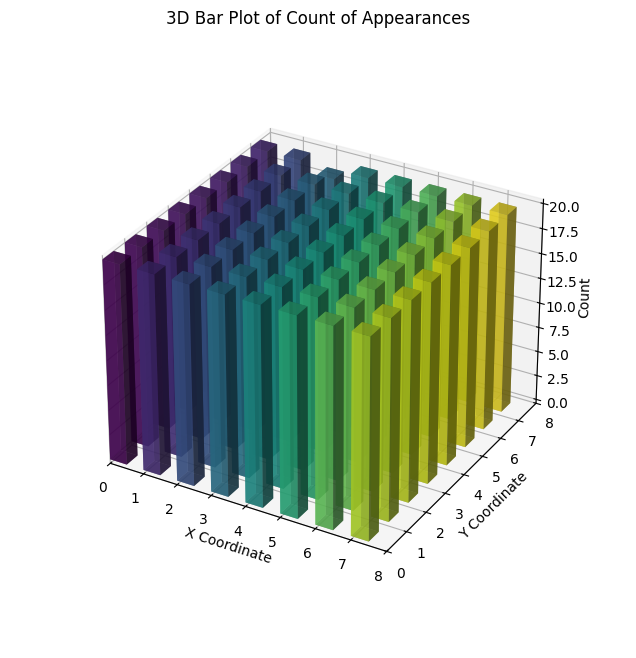

In [ ]:
# Count appearances of (X_Coord, Y_Coord) pairs
count_data = combined_df.groupby(['X_Coord', 'Y_Coord']).size().reset_index(name='Count')
print(count_data)
# Create a grid for the surface plot
x = count_data['X_Coord'].unique()
y = count_data['Y_Coord'].unique()
X, Y = np.meshgrid(x, y)

# Prepare the Z values (Count)
Z = np.zeros_like(X)

for i in range(len(count_data)):
    x_idx = np.where(x == count_data['X_Coord'].iloc[i])[0][0]
    y_idx = np.where(y == count_data['Y_Coord'].iloc[i])[0][0]
    Z[y_idx, x_idx] = count_data['Count'].iloc[i]


colors = plt.cm.viridis(np.linspace(0, 1, len(count_data)))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create 3D bar plot

x = count_data['X_Coord']
y = count_data['Y_Coord']
z = np.zeros(len(count_data))
dx = dy = 0.5  # Width and depth of bars
dz = count_data['Count']

ax.bar3d(x, y, z, dx, dy, dz, color=colors, alpha=0.7)

ax.set_xlabel('X Coordinate')
ax.set_xlim([0,8])
ax.set_ylabel('Y Coordinate')
ax.set_ylim([0,8])
ax.set_zlabel('Count')

ax.set_title('3D Bar Plot of Count of Appearances')
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()
# fig.savefig('./figures/Train_Data.png')

## Calculating average in RSSI and Batt


In [49]:
def create_avg_df(combined_df):
    # Group by X_Coord and Y_Coord
    combined_df = combined_df.drop([col for col in combined_df.columns if 'Time' in col], axis=1)

    grouped = combined_df.groupby(['X_Coord', 'Y_Coord']).mean().reset_index()

    # Rename columns to reflect that these are averages
    avg_columns = {col: col.replace('RSSI', 'RSSI_Avg').replace('Batt', 'Batt_Avg') for col in grouped.columns if 'RSSI' in col or 'Batt' in col}
    
    # Apply the renaming to the grouped DataFrame
    grouped.rename(columns=avg_columns, inplace=True)
    
    return grouped

In [50]:
avg_df = create_avg_df(combined_df)
data = avg_df
data

,X_Coord,Y_Coord,Tx_0 RSSI_Avg,Tx_0 Batt_Avg,Tx_1 RSSI_Avg,Tx_1 Batt_Avg,Tx_2 RSSI_Avg,Tx_2 Batt_Avg,Tx_3 RSSI_Avg,Tx_3 Batt_Avg,Tx_4 RSSI_Avg,Tx_4 Batt_Avg,Tx_5 RSSI_Avg,Tx_5 Batt_Avg,Tx_6 RSSI_Avg,Tx_6 Batt_Avg,Tx_7 RSSI_Avg,Tx_7 Batt_Avg
0,0,0,-60.000000,4.155000,-67.650000,4.137778,-73.100000,4.117857,-74.105263,4.107143,-71.750000,4.103125,-79.210526,4.076000,-82.466667,4.124615,-76.700000,4.100000
1,0,1,-64.000000,4.154706,-60.500000,4.136250,-73.450000,4.117059,-68.900000,4.110000,-76.421053,4.097857,-76.352941,4.080769,-72.500000,4.126471,-71.105263,4.100667
2,0,2,-60.850000,4.157059,-63.550000,4.132667,-78.600000,4.119333,-72.250000,4.106429,-80.789474,4.099286,-76.850000,4.075333,-77.500000,4.126667,-76.100000,4.105294
3,0,3,-64.750000,4.155000,-56.200000,4.131667,-68.550000,4.116111,-61.650000,4.109412,-68.100000,4.103750,-72.550000,4.079412,-77.150000,4.120000,-75.200000,4.102500
4,0,4,-63.550000,4.156875,-59.750000,4.132778,-73.750000,4.117333,-69.750000,4.107333,-84.000000,4.090000,-69.600000,4.078125,-78.150000,4.127500,-74.400000,4.098889
5,0,5,-68.050000,4.150000,-62.050000,4.131818,-60.050000,4.113158,-63.800000,4.105625,-84.500000,4.095000,-69.684211,4.080000,-76.350000,4.124375,-72.550000,4.101176
6,0,6,-69.842105,4.148235,-56.400000,4.133000,-61.750000,4.113750,-64.650000,4.105333,-79.368421,4.097333,-82.937500,4.075833,NaN,NaN,-83.400000,4.087500
7,0,7,-74.250000,4.149286,-67.200000,4.133846,-55.750000,4.112105,-67.300000,4.106923,-74.200000,4.098333,-82.833333,4.080000,-83.111111,4.126000,-80.000000,4.107778
8,1,0,-66.550000,4.145882,-71.150000,4.128000,-71.950000,4.112143,-69.650000,4.101875,-71.100000,4.096250,-81.200000,4.046154,-80.400000,4.120667,-67.500000,4.100500
9,1,1,-57.400000,4.146842,-61.400000,4.125000,-70.700000,4.109375,-73.800000,4.105714,-74.450000,4.096000,-71.250000,4.053125,-80.894737,4.122857,-81.187500,4.100000


In [51]:
batt_columns = [col for col in data.columns if 'Batt' in col]

RSSI_columns = data.drop(columns=batt_columns)


In [52]:
pd.set_option('display.max_rows', 100)  # Adjust as needed
pd.set_option('display.max_columns', 100)  # Adjust as needed
pd.set_option('display.max_colwidth', None)
RSSI_columns.head(64)

,X_Coord,Y_Coord,Tx_0 RSSI_Avg,Tx_1 RSSI_Avg,Tx_2 RSSI_Avg,Tx_3 RSSI_Avg,Tx_4 RSSI_Avg,Tx_5 RSSI_Avg,Tx_6 RSSI_Avg,Tx_7 RSSI_Avg
0,0,0,-60.000000,-67.650000,-73.100000,-74.105263,-71.750000,-79.210526,-82.466667,-76.700000
1,0,1,-64.000000,-60.500000,-73.450000,-68.900000,-76.421053,-76.352941,-72.500000,-71.105263
2,0,2,-60.850000,-63.550000,-78.600000,-72.250000,-80.789474,-76.850000,-77.500000,-76.100000
3,0,3,-64.750000,-56.200000,-68.550000,-61.650000,-68.100000,-72.550000,-77.150000,-75.200000
4,0,4,-63.550000,-59.750000,-73.750000,-69.750000,-84.000000,-69.600000,-78.150000,-74.400000
5,0,5,-68.050000,-62.050000,-60.050000,-63.800000,-84.500000,-69.684211,-76.350000,-72.550000
6,0,6,-69.842105,-56.400000,-61.750000,-64.650000,-79.368421,-82.937500,NaN,-83.400000
7,0,7,-74.250000,-67.200000,-55.750000,-67.300000,-74.200000,-82.833333,-83.111111,-80.000000
8,1,0,-66.550000,-71.150000,-71.950000,-69.650000,-71.100000,-81.200000,-80.400000,-67.500000
9,1,1,-57.400000,-61.400000,-70.700000,-73.800000,-74.450000,-71.250000,-80.894737,-81.187500


There is a total of 4 NaN entries

## Calculation of 'noise' to add into training data

In [53]:
noise_path = './Data/1m2mreadings/samples_normalised_2m.txt'
noise_df = pd.read_csv(noise_path, header=None)
noise_values = noise_df[0].values

In [54]:
noise_df

,0
0,-1.489122
1,1.112969
2,5.087780
3,-3.078940
4,3.048419
...,...
1300,-0.158630
1301,-2.619889
1302,0.621448
1303,-4.215428


In [55]:
rssi_columns = [col for col in RSSI_columns.columns if 'RSSI' in col]
print(rssi_columns)

['Tx_0 RSSI_Avg', 'Tx_1 RSSI_Avg', 'Tx_2 RSSI_Avg', 'Tx_3 RSSI_Avg', 'Tx_4 RSSI_Avg', 'Tx_5 RSSI_Avg', 'Tx_6 RSSI_Avg', 'Tx_7 RSSI_Avg']


In [56]:
augmented_dfs = []
for _ in range(200):
    # Create a copy of the original DataFrame
    temp_df = RSSI_columns.copy()

    for col in rssi_columns:
        # Identify non-NaN entries
        not_nan_mask = temp_df[col].notna()

        # Generate random noise for the non-NaN entries
        random_noise = np.random.choice(noise_values, size=not_nan_mask.sum(), replace=True)

        # Add noise to the non-NaN entries
        temp_df.loc[not_nan_mask, col] += random_noise

    # Append the modified DataFrame to the list
    augmented_dfs.append(temp_df)

In [57]:
augmented_dataset = pd.concat(augmented_dfs, ignore_index=True)
augmented_dataset = augmented_dataset.sort_values(by=['X_Coord', 'Y_Coord']).reset_index(drop=True)

augmented_dataset.shape

(12800, 10)

In [58]:
file_path = os.path.join(Data_Directory, 'augmented_rssi_dataset.csv')
augmented_dataset.to_csv(file_path, index=False)
print("Augmented dataset created with shape:", augmented_dataset.shape)

Augmented dataset created with shape: (12800, 10)


In [59]:
# for col in rssi_columns:
#     # Identify non-NaN entries
#     not_nan_mask = RSSI_columns[col].notna()
    
#     # Generate random noise for the non-NaN entries
#     random_noise = np.random.choice(noise_df[0].values, size=not_nan_mask.sum(), replace=True)
    
#     # Add noise to the non-NaN entries
#     RSSI_columns.loc[not_nan_mask, col] += random_noise

In [60]:
# RSSI_columns